# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Loading Data

In [4]:
test = pd.read_csv("digit-recognizer/test.csv")
train = pd.read_csv("digit-recognizer/train.csv")

# EDA

Checking file content:

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Training data distribution:

In [16]:
# Counting the total number of each label
counts_train = train['label'].value_counts().sort_index()
print(counts_train)

print(f"Total counts: {counts_train.sum()}")

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64
Total counts: 42000


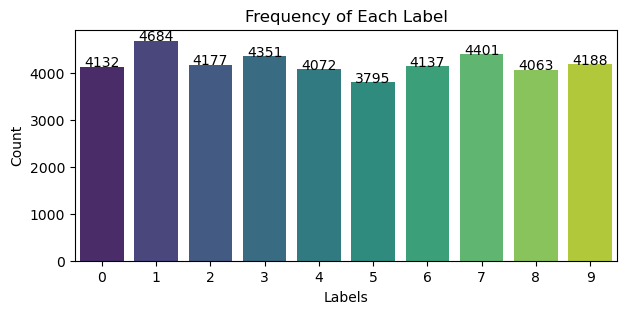

In [11]:
# Plotting frequency chart
plt.figure(figsize=(7,3))
sns.barplot(x=counts_train.index, y=counts_train.values, palette='viridis')

# Add count labels on top of each column
for index, value in enumerate(counts_train.values):
    plt.text(index, value + 0.05, str(value), ha='center')

# Set title and labels
plt.title('Frequency of Each Label')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

Displaying digits:

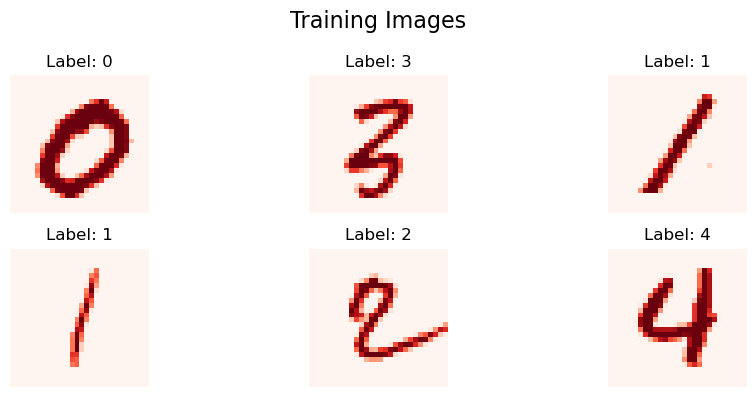

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(10, 4))
axes = axes.flatten()

for i in range(6):
    random_image = random.randint(0,train.shape[0]) 
    image = train.iloc[random_image, 1:].values
    label = train.iloc[random_image, 0]
    
    image_data = image.reshape(28, 28)
    
    axes[i-1].imshow(image_data, cmap='Reds')
    axes[i-1].set_title(f'Label: {label}')
    axes[i-1].axis('off') 

plt.suptitle("Training Images", size=16)
plt.tight_layout()
plt.show()

# ANN Approach